In [1]:
%config IPCompleter.greedy=True


In [2]:
import pandas as pd

df_train = pd.read_csv('train_kaggle.csv')
df_train

,Id,label
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
5,5,0
6,6,0
7,7,0
8,8,1
9,9,0


In [3]:
df_train['label'].describe()

count    30336.000000
mean         0.077664
std          0.267646
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: label, dtype: float64

In [4]:
import seaborn as sns

sns.distplot(df_train['label']);

In [5]:
import numpy as np

train0 = np.load('train/train/0.npy')
train0

array([[nan, nan,  1., ..., nan, nan, nan],
       [nan, nan,  2., ..., 19., nan, nan],
       [nan, nan,  3., ..., 22., nan, nan],
       ...,
       [nan, nan, 52., ..., 26., nan, nan],
       [nan, nan, 53., ..., 22., nan, nan],
       [nan, nan, 54., ..., 18., nan, nan]])

In [6]:
def load_dataframe(id):
    train_data = np.load("train/train/{}.npy".format(id))
    return pd.DataFrame(data=train_data)

In [7]:
def get_missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [8]:
def clear_missing_data(df, missing_indices):
    df = df.drop(missing_indices,1)
    # for col in df_temp.columns:
    #    df = df.drop(df.loc[df[col].isnull()].index)
    count = df.isnull().sum().max() #just checking that there's no missing data missing...
    if count > 0:
        print(count)
        return pd.DataFrame()
    return df

In [9]:
df8 = load_dataframe(8)
missing_df8 = get_missing_data(df8)
missing_indices = missing_df8[missing_df8['Total'] > 0].index.append(pd.Index([11,33,35]))
cleaned_df8 = clear_missing_data(df8, missing_indices)
missing_indices.sort_values(ascending=True)

Int64Index([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
            18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
            35, 36, 37, 38, 39],
           dtype='int64')

In [10]:
cleaned_df8

,2
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,10.0


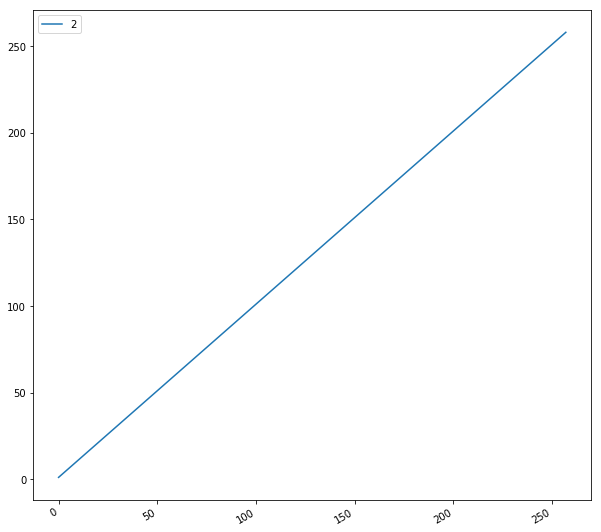

In [11]:
import matplotlib.pyplot as plt
cleaned_df8.plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [12]:
from tsfresh import extract_features

cleaned_df8['Id'] = 8
extracted_features = extract_features(cleaned_df8, column_id="Id")

Feature Extraction: 100%|████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.67s/it]


In [13]:
extracted_features

variable,2__abs_energy,2__absolute_sum_of_changes,"2__agg_autocorrelation__f_agg_""mean""__maxlag_40","2__agg_autocorrelation__f_agg_""median""__maxlag_40","2__agg_autocorrelation__f_agg_""var""__maxlag_40","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","2__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,2__symmetry_looking__r_0.9,2__symmetry_looking__r_0.9500000000000001,2__time_reversal_asymmetry_statistic__lag_1,2__time_reversal_asymmetry_statistic__lag_2,2__time_reversal_asymmetry_statistic__lag_3,2__value_count__value_-1,2__value_count__value_0,2__value_count__value_1,2__variance,2__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
8,5757829.0,257.0,0.824452,0.828448,0.010768,10.136752,0.999988,9.982906,0.009869,58.0,...,1.0,1.0,88926.0,177172.0,264746.0,0.0,0.0,1.0,5546.916667,1.0


In [14]:
extracted_features.columns

Index(['2__abs_energy', '2__absolute_sum_of_changes',
       '2__agg_autocorrelation__f_agg_"mean"__maxlag_40',
       '2__agg_autocorrelation__f_agg_"median"__maxlag_40',
       '2__agg_autocorrelation__f_agg_"var"__maxlag_40',
       '2__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"intercept"',
       '2__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"rvalue"',
       '2__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"slope"',
       '2__agg_linear_trend__f_agg_"max"__chunk_len_10__attr_"stderr"',
       '2__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"intercept"',
       ...
       '2__symmetry_looking__r_0.9',
       '2__symmetry_looking__r_0.9500000000000001',
       '2__time_reversal_asymmetry_statistic__lag_1',
       '2__time_reversal_asymmetry_statistic__lag_2',
       '2__time_reversal_asymmetry_statistic__lag_3',
       '2__value_count__value_-1', '2__value_count__value_0',
       '2__value_count__value_1', '2__variance',
       '2__variance_larger_than_s

In [15]:
y = df_train['label']
y

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        1
9        0
10       1
11       0
12       0
13       0
14       1
15       0
16       0
17       1
18       0
19       0
20       0
21       1
22       0
23       0
24       0
25       0
26       0
27       1
28       0
29       0
        ..
30306    0
30307    0
30308    0
30309    0
30310    0
30311    0
30312    0
30313    0
30314    0
30315    0
30316    0
30317    0
30318    0
30319    0
30320    0
30321    1
30322    0
30323    0
30324    0
30325    0
30326    0
30327    0
30328    0
30329    0
30330    0
30331    0
30332    0
30333    1
30334    0
30335    1
Name: label, Length: 30336, dtype: int64

In [16]:
y[8]
np.array([y[8]])

array([1], dtype=int64)

In [17]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)

variable,2__abs_energy,2__absolute_sum_of_changes,"2__agg_autocorrelation__f_agg_""mean""__maxlag_40","2__agg_autocorrelation__f_agg_""median""__maxlag_40","2__agg_autocorrelation__f_agg_""var""__maxlag_40","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","2__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,2__symmetry_looking__r_0.9,2__symmetry_looking__r_0.9500000000000001,2__time_reversal_asymmetry_statistic__lag_1,2__time_reversal_asymmetry_statistic__lag_2,2__time_reversal_asymmetry_statistic__lag_3,2__value_count__value_-1,2__value_count__value_0,2__value_count__value_1,2__variance,2__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
8,5757829.0,257.0,0.824452,0.828448,0.010768,10.136752,0.999988,9.982906,0.009869,58.0,...,1.0,1.0,88926.0,177172.0,264746.0,0.0,0.0,1.0,5546.916667,1.0


In [18]:
df0 = load_dataframe(8)
cleaned_df0 = clear_missing_data(df0, missing_indices)
cleaned_df0

,2
0,1.0
1,2.0
2,3.0
3,4.0
4,5.0
5,6.0
6,7.0
7,8.0
8,9.0
9,10.0


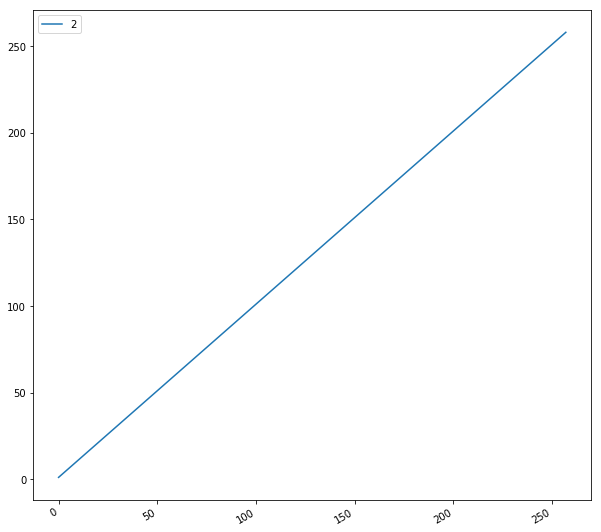

In [19]:
cleaned_df0.plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [20]:
dataframes = []
for id in df_train['Id']:
    dfi = clear_missing_data(load_dataframe(id), missing_indices)
    if dfi.empty:
        print("{}:".format(id))
        continue
    dfi['Id'] = id
    dataframes.append(dfi)

df_train_all = pd.concat(dataframes, ignore_index=True)

In [21]:
df_train_all

,2,Id
0,1.0,0
1,2.0,0
2,3.0,0
3,4.0,0
4,5.0,0
5,6.0,0
6,7.0,0
7,8.0,0
8,9.0,0
9,10.0,0


In [22]:
from tsfresh import extract_features

extracted_features = extract_features(df_train_all, column_id="Id")
extracted_features

Feature Extraction: 100%|█████████████████████████████████████████████████████████████| 10/10 [45:56<00:00, 275.61s/it]


variable,2__abs_energy,2__absolute_sum_of_changes,"2__agg_autocorrelation__f_agg_""mean""__maxlag_40","2__agg_autocorrelation__f_agg_""median""__maxlag_40","2__agg_autocorrelation__f_agg_""var""__maxlag_40","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","2__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,2__symmetry_looking__r_0.9,2__symmetry_looking__r_0.9500000000000001,2__time_reversal_asymmetry_statistic__lag_1,2__time_reversal_asymmetry_statistic__lag_2,2__time_reversal_asymmetry_statistic__lag_3,2__value_count__value_-1,2__value_count__value_0,2__value_count__value_1,2__variance,2__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,53955.0,53.0,-0.139280,-0.048027,0.572779,11.142857,0.994192,9.142857,0.494872,50.000000,...,1.0,1.0,3926.000000,7716.000000,11378.0,0.0,0.0,1.0,242.916667,1.0
1,4324.0,22.0,-0.655303,-0.503788,1.240487,11.166667,0.954919,6.500000,2.020726,NaN,...,1.0,1.0,722.666667,1392.000000,2016.0,0.0,0.0,1.0,44.000000,1.0
2,38024.0,47.0,-0.335215,-0.219713,0.806704,10.400000,0.999133,9.600000,0.230940,NaN,...,1.0,1.0,3106.000000,6092.000000,8966.0,0.0,0.0,1.0,191.916667,1.0
3,8555.0,28.0,-0.657143,-0.502381,1.263571,10.166667,0.999539,9.500000,0.288675,NaN,...,1.0,1.0,1142.666667,2216.000000,3228.0,0.0,0.0,1.0,70.000000,1.0
4,40424.0,47.0,-0.335215,-0.219713,0.806704,11.400000,0.999133,9.600000,0.230940,NaN,...,1.0,1.0,3306.000000,6492.000000,9566.0,0.0,0.0,0.0,191.916667,1.0
5,2465.0,16.0,-0.652778,-0.506944,1.201871,12.000000,1.000000,7.000000,0.000000,NaN,...,1.0,1.0,558.666667,1080.000000,1572.0,0.0,0.0,0.0,24.000000,1.0
6,31395.0,44.0,-0.458498,-0.327075,0.976127,11.000000,0.993884,9.000000,0.577350,NaN,...,1.0,1.0,2732.000000,5352.000000,7868.0,0.0,0.0,1.0,168.666667,1.0
7,22140.0,39.0,-0.659370,-0.500938,1.288293,10.000000,1.000000,10.000000,0.000000,NaN,...,1.0,1.0,2162.000000,4225.333333,6198.0,0.0,0.0,1.0,133.250000,1.0
8,5757829.0,257.0,0.824452,0.828448,0.010768,10.136752,0.999988,9.982906,0.009869,58.000000,...,1.0,1.0,88926.000000,177172.000000,264746.0,0.0,0.0,1.0,5546.916667,1.0


In [23]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

In [37]:
scaler = preprocessing.StandardScaler().fit(features_filtered)
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [58]:
from sklearn import preprocessing

XTrain = features_filtered
# XTrain = scaler.transform(features_filtered)
XTrain

variable,"2__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_10__w_20","2__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_20","2__fft_coefficient__coeff_24__attr_""abs""","2__fft_coefficient__coeff_24__attr_""angle""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""intercept""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""rvalue""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""slope""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""stderr""","2__fft_coefficient__coeff_24__attr_""imag""","2__fft_coefficient__coeff_24__attr_""real""",...,"2__fft_coefficient__coeff_1__attr_""abs""","2__fft_coefficient__coeff_3__attr_""abs""","2__fft_coefficient__coeff_83__attr_""angle""",2__index_mass_quantile__q_0.8,"2__fft_coefficient__coeff_83__attr_""real""","2__fft_coefficient__coeff_43__attr_""angle""","2__fft_coefficient__coeff_43__attr_""imag""","2__fft_coefficient__coeff_43__attr_""abs""",2__index_mass_quantile__q_0.7,2__energy_ratio_by_chunks__num_segments_10__segment_focus_1
id,,,,,,,,,,,,,,,,,,,,,
0,42.542922,11.520320,27.416519,170.000000,208.250000,-1.000000,-207.00,0.000000,4.760828,-27.0,...,464.357717,155.486803,159.813084,0.907407,-107.0,148.636364,40.229099,77.294116,0.851852,0.010360
1,41.601970,11.893362,26.793653,171.509434,208.250000,-1.000000,-206.25,0.000000,3.955991,-26.5,...,84.455335,28.865383,159.813084,0.913043,-107.0,148.636364,40.229099,77.294116,0.869565,0.017808
2,48.339256,15.710747,24.000000,180.000000,208.250000,-1.000000,-206.25,0.000000,0.000000,-24.0,...,366.954919,123.019941,159.813084,0.895833,-107.0,148.636364,40.229099,77.294116,0.854167,0.008679
3,48.098046,15.671799,26.793653,171.509434,208.250000,-1.000000,-206.25,0.000000,3.955991,-26.5,...,134.111465,45.411621,159.813084,0.896552,-107.0,148.636364,40.229099,77.294116,0.862069,0.009001
4,52.317242,17.976730,24.000000,180.000000,208.250000,-1.000000,-206.25,0.000000,0.000000,-24.0,...,366.954919,123.019941,159.813084,0.895833,-107.0,148.636364,40.229099,77.294116,0.833333,0.010266
5,32.811491,10.895299,26.793653,171.509434,208.250000,-1.000000,-206.25,0.000000,3.955991,-26.5,...,46.258625,16.146430,159.813084,0.882353,-107.0,148.636364,40.229099,77.294116,0.823529,0.024746
6,52.155671,18.177718,26.793653,171.509434,208.250000,-1.000000,-206.25,0.000000,3.955991,-26.5,...,322.550708,108.219023,159.813084,0.911111,-107.0,148.636364,40.229099,77.294116,0.844444,0.010511
7,51.222532,17.722869,26.793653,171.509434,208.250000,-1.000000,-206.25,0.000000,3.955991,-26.5,...,254.909897,85.673151,159.813084,0.900000,-107.0,148.636364,40.229099,77.294116,0.850000,0.007859
8,-67.590892,-77.560290,447.762594,106.744186,246.916667,-0.654654,-29.00,16.743158,428.777728,-129.0,...,10594.251436,3532.115398,147.906977,0.895349,-129.0,120.000000,223.434554,258.000000,0.837209,0.007299


In [59]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gb_clf = GradientBoostingClassifier()
scores = cross_val_score(gb_clf, XTrain, y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
scores

Accuracy: 0.95 (+/- 0.01)


array([0.95105471, 0.9520356 , 0.95104665, 0.94742047, 0.94461843])

In [60]:
gb_clf.fit(XTrain, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [27]:
def load_dataframe_test(id):
    train_data = np.load("test/test/{}.npy".format(id))
    return pd.DataFrame(data=train_data)

df_test = pd.read_csv('sample_solution.csv')
dataframestest = []
for id in df_test['Id']:
    dfi = clear_missing_data(load_dataframe_test(id), missing_indices)
    if dfi.empty:
        print("{}:".format(id))
        continue
    dfi['Id'] = id
    dataframestest.append(dfi)

df_test_all = pd.concat(dataframestest, ignore_index=True)

In [28]:
df_test_all

,2,Id
0,1.0,0
1,2.0,0
2,3.0,0
3,4.0,0
4,5.0,0
5,6.0,0
6,7.0,0
7,8.0,0
8,9.0,0
9,10.0,0


In [29]:
extracted_features_test = extract_features(df_test_all, column_id="Id")
extracted_features_test

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 10/10 [11:51<00:00, 71.14s/it]


variable,2__abs_energy,2__absolute_sum_of_changes,"2__agg_autocorrelation__f_agg_""mean""__maxlag_40","2__agg_autocorrelation__f_agg_""median""__maxlag_40","2__agg_autocorrelation__f_agg_""var""__maxlag_40","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","2__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","2__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,2__symmetry_looking__r_0.9,2__symmetry_looking__r_0.9500000000000001,2__time_reversal_asymmetry_statistic__lag_1,2__time_reversal_asymmetry_statistic__lag_2,2__time_reversal_asymmetry_statistic__lag_3,2__value_count__value_-1,2__value_count__value_0,2__value_count__value_1,2__variance,2__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
0,53955.0,53.0,-0.139280,-0.048027,0.572779,11.142857,0.994192,9.142857,0.494872,50.0,...,1.0,1.0,3926.000000,7716.000000,11378.0,0.0,0.0,1.0,242.916667,1.0
1,22140.0,39.0,-0.659370,-0.500938,1.288293,10.000000,1.000000,10.000000,0.000000,NaN,...,1.0,1.0,2162.000000,4225.333333,6198.0,0.0,0.0,1.0,133.250000,1.0
2,38024.0,47.0,-0.335215,-0.219713,0.806704,10.400000,0.999133,9.600000,0.230940,NaN,...,1.0,1.0,3106.000000,6092.000000,8966.0,0.0,0.0,1.0,191.916667,1.0
3,63365.0,56.0,-0.060345,0.021552,0.490605,10.571429,0.998666,9.571429,0.247436,50.0,...,1.0,1.0,4372.000000,8600.000000,12692.0,0.0,0.0,1.0,270.666667,1.0
4,35720.0,46.0,-0.374094,-0.253623,0.858264,10.600000,0.997969,9.400000,0.346410,NaN,...,1.0,1.0,2978.666667,5840.000000,8592.0,0.0,0.0,1.0,184.000000,1.0
5,2109.0,17.0,-0.653251,-0.504644,1.210018,10.000000,1.000000,8.000000,0.000000,NaN,...,1.0,1.0,446.000000,852.000000,1226.0,0.0,0.0,1.0,26.916667,1.0
6,2470.0,18.0,-0.653704,-0.505556,1.217342,10.000000,1.000000,9.000000,0.000000,NaN,...,1.0,1.0,496.000000,949.333333,1368.0,0.0,0.0,1.0,30.000000,1.0
7,4324.0,22.0,-0.655303,-0.503788,1.240487,11.166667,0.954919,6.500000,2.020726,NaN,...,1.0,1.0,722.666667,1392.000000,2016.0,0.0,0.0,1.0,44.000000,1.0
8,2109.0,17.0,-0.653251,-0.504644,1.210018,10.000000,1.000000,8.000000,0.000000,NaN,...,1.0,1.0,446.000000,852.000000,1226.0,0.0,0.0,1.0,26.916667,1.0


In [47]:
XTest = extracted_features_test[features_filtered.columns]
XTest

variable,"2__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_10__w_20","2__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_20","2__fft_coefficient__coeff_24__attr_""abs""","2__fft_coefficient__coeff_24__attr_""angle""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""intercept""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""rvalue""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""slope""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""stderr""","2__fft_coefficient__coeff_24__attr_""imag""","2__fft_coefficient__coeff_24__attr_""real""",...,"2__fft_coefficient__coeff_1__attr_""abs""","2__fft_coefficient__coeff_3__attr_""abs""","2__fft_coefficient__coeff_83__attr_""angle""",2__index_mass_quantile__q_0.8,"2__fft_coefficient__coeff_83__attr_""real""","2__fft_coefficient__coeff_43__attr_""angle""","2__fft_coefficient__coeff_43__attr_""imag""","2__fft_coefficient__coeff_43__attr_""abs""",2__index_mass_quantile__q_0.7,2__energy_ratio_by_chunks__num_segments_10__segment_focus_1
id,,,,,,,,,,,,,,,,,,,,,
0,42.542922,11.520320,27.416519,170.000000,208.25,-1.000000,-207.000000,0.000000,4.760828,-27.0,...,464.357717,155.486803,NaN,0.907407,NaN,NaN,NaN,NaN,0.851852,0.010360
1,51.222532,17.722869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,254.909897,85.673151,NaN,0.900000,NaN,NaN,NaN,NaN,0.850000,0.007859
2,48.339256,15.710747,24.000000,180.000000,NaN,NaN,NaN,NaN,0.000000,-24.0,...,366.954919,123.019941,NaN,0.895833,NaN,NaN,NaN,NaN,0.854167,0.008679
3,40.517203,9.691808,29.399621,165.789474,208.25,-1.000000,-204.250000,0.000000,7.217180,-28.5,...,517.356302,173.152714,NaN,0.894737,NaN,NaN,NaN,NaN,0.842105,0.008822
4,51.057934,17.402845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,351.835205,117.980188,NaN,0.893617,NaN,NaN,NaN,NaN,0.851064,0.009239
5,30.376144,7.521753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.828934,18.000000,NaN,0.944444,NaN,NaN,NaN,NaN,0.833333,0.011854
6,33.424229,9.085943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,57.717571,19.960189,NaN,0.894737,NaN,NaN,NaN,NaN,0.842105,0.010121
7,41.601970,11.893362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84.455335,28.865383,NaN,0.913043,NaN,NaN,NaN,NaN,0.869565,0.017808
8,30.376144,7.521753,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,51.828934,18.000000,NaN,0.944444,NaN,NaN,NaN,NaN,0.833333,0.011854


In [61]:
XTest = extracted_features_test[features_filtered.columns]
XTest = XTest.replace([np.inf], np.finfo('float32').max).replace([np.inf, -np.inf], np.finfo('float32').min).fillna(0)
print(np.all(np.isfinite(XTest)))
# XTest

True


In [62]:
# XTest = scaler.transform(XTest)
XTest

variable,"2__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_10__w_20","2__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_0__w_20","2__fft_coefficient__coeff_24__attr_""abs""","2__fft_coefficient__coeff_24__attr_""angle""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""intercept""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""rvalue""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""slope""","2__agg_linear_trend__f_agg_""var""__chunk_len_50__attr_""stderr""","2__fft_coefficient__coeff_24__attr_""imag""","2__fft_coefficient__coeff_24__attr_""real""",...,"2__fft_coefficient__coeff_1__attr_""abs""","2__fft_coefficient__coeff_3__attr_""abs""","2__fft_coefficient__coeff_83__attr_""angle""",2__index_mass_quantile__q_0.8,"2__fft_coefficient__coeff_83__attr_""real""","2__fft_coefficient__coeff_43__attr_""angle""","2__fft_coefficient__coeff_43__attr_""imag""","2__fft_coefficient__coeff_43__attr_""abs""",2__index_mass_quantile__q_0.7,2__energy_ratio_by_chunks__num_segments_10__segment_focus_1
id,,,,,,,,,,,,,,,,,,,,,
0,42.542922,11.520320,27.416519,170.000000,208.25,-1.000000,-207.000000,0.000000,4.760828,-27.0,...,464.357717,155.486803,0.000000,0.907407,0.0,0.000000,0.000000,0.000000,0.851852,0.010360
1,51.222532,17.722869,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,254.909897,85.673151,0.000000,0.900000,0.0,0.000000,0.000000,0.000000,0.850000,0.007859
2,48.339256,15.710747,24.000000,180.000000,0.00,0.000000,0.000000,0.000000,0.000000,-24.0,...,366.954919,123.019941,0.000000,0.895833,0.0,0.000000,0.000000,0.000000,0.854167,0.008679
3,40.517203,9.691808,29.399621,165.789474,208.25,-1.000000,-204.250000,0.000000,7.217180,-28.5,...,517.356302,173.152714,0.000000,0.894737,0.0,0.000000,0.000000,0.000000,0.842105,0.008822
4,51.057934,17.402845,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,351.835205,117.980188,0.000000,0.893617,0.0,0.000000,0.000000,0.000000,0.851064,0.009239
5,30.376144,7.521753,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,51.828934,18.000000,0.000000,0.944444,0.0,0.000000,0.000000,0.000000,0.833333,0.011854
6,33.424229,9.085943,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,57.717571,19.960189,0.000000,0.894737,0.0,0.000000,0.000000,0.000000,0.842105,0.010121
7,41.601970,11.893362,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,84.455335,28.865383,0.000000,0.913043,0.0,0.000000,0.000000,0.000000,0.869565,0.017808
8,30.376144,7.521753,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.0,...,51.828934,18.000000,0.000000,0.944444,0.0,0.000000,0.000000,0.000000,0.833333,0.011854


In [63]:
probs = gb_clf.predict_proba(XTest)
probs

c:\users\junwei\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
c:\users\junwei\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)


array([[0.99361886, 0.00638114],
       [0.99438594, 0.00561406],
       [0.9949407 , 0.0050593 ],
       ...,
       [0.9851513 , 0.0148487 ],
       [0.99138147, 0.00861853],
       [0.99437832, 0.00562168]])

In [64]:
res = probs[:, 0]
res

array([0.99361886, 0.99438594, 0.9949407 , ..., 0.9851513 , 0.99138147,
       0.99437832])

In [65]:
df_test['Predicted'] = res
df_test

,Id,Predicted
0,0,0.993619
1,1,0.994386
2,2,0.994941
3,3,0.994864
4,4,0.993685
5,5,0.974977
6,6,0.985391
7,7,0.982254
8,8,0.974977
9,9,0.995614


In [66]:
df_test.to_csv('test.csv', index=False)

In [67]:
np.save('xtrain.npy', XTrain)

In [68]:
np.save('xtest.npy', XTest)

In [144]:
np.load('xtrain.npy')

array([[-0.09435877, -0.1196359 , -0.08681563, ..., -0.05214123,
         0.33429963, -0.42367911],
       [-0.13820589, -0.09438997, -0.10676852, ..., -0.05214123,
         1.62500033,  0.56524915],
       [ 0.17574274,  0.16395475, -0.19626056, ..., -0.05214123,
         0.50297074, -0.64700582],
       ...,
       [ 0.35481676,  0.33468027, -0.10676852, ..., -0.05214123,
         0.7198336 , -0.24978112],
       [ 0.23438597,  0.22407353, -0.10676852, ..., -0.05214123,
         0.04095856, -0.49179869],
       [ 0.1812141 , -0.77156415, -0.10676852, ..., -0.05214123,
         2.02101078,  0.80431209]])